# Email Dataset

In [28]:
#per-node in-degree
import pandas as pd

# Per-node indegree (node_id, indegree)
df1_nodes = pd.read_csv(
    "email_indegree_nodes.txt",
    sep=r"\s+",
    header=None,
    names=["node_id", "indegree"]
)

# Show first 10 rows
df1_nodes.head(10)

#indegree shows how many incoming edges that node has

,node_id,indegree
0,1,895
1,10,1354
2,100000,1
3,100002,1
4,100008,1
5,10001,1
6,100012,1
7,100013,1
8,100015,1
9,100022,1


In [30]:
# Degree distribution (degree k, count of nodes with that k)
df1_dist = pd.read_csv(
    "email_indegree_dist.txt",
    sep=r"\s+",
    header=None,
    names=["degree", "count"]
)

# Show first 10 rows 
df1_dist.head(10)

# count shows how many nodes have in-degree k

,degree,count
0,1,61936
1,10,93
2,100,4
3,101,4
4,1017,1
5,102,3
6,1021,1
7,103,2
8,104,4
9,1043,1


In [32]:
df1_dist.sort_values("degree").head(10)

,degree,count
0,1,61936
142,2,6769
237,3,2012
306,4,917
372,5,520
417,6,283
448,7,210
478,8,166
499,9,121
1,10,93


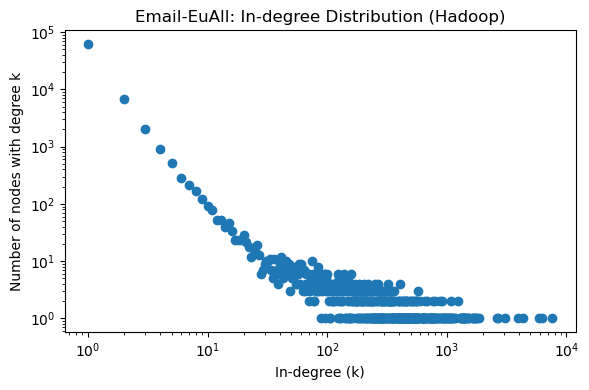

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the distribution file (degree, count)
df_email = pd.read_csv(
    "email_indegree_dist.txt",
    sep=r"\s+",          # split on whitespace or tab
    header=None,
    names=["degree", "count"]
)

# (Optional) Remove zero-degree if present
df_email = df_email[df_email["degree"] > 0]

# 2) Basic log–log scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df_email["degree"], df_email["count"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("In-degree (k)")
plt.ylabel("Number of nodes with degree k")
plt.title("Email-EuAll: In-degree Distribution (Hadoop)")
plt.tight_layout()
plt.show()

In [9]:
import re
import pandas as pd
from pathlib import Path

def parse_hadoop_log(log_path, job_name, dataset, stage):
    """
    Parse a Hadoop Streaming log file and extract key performance metrics.
    """
    log_path = Path(log_path)
    text = log_path.read_text(errors="ignore")
    
    def ex(pattern, default=None):
        m = re.search(pattern, text)
        return int(m.group(1)) if m else default

    metrics = {
        "job": job_name,
        "dataset": dataset,
        "stage": stage,
        # File I/O
        "bytes_read": ex(r"File Input Format Counters[\s\S]*?Bytes Read=(\d+)"),
        "bytes_written": ex(r"File Output Format Counters[\s\S]*?Bytes Written=(\d+)"),
        # Shuffle / network
        "shuffle_bytes": ex(r"Reduce shuffle bytes=(\d+)"),
        # Time (ms)
        "map_time_ms": ex(r"Total time spent by all map tasks \(ms\)=(\d+)"),
        "reduce_time_ms": ex(r"Total time spent by all reduce tasks \(ms\)=(\d+)"),
        "cpu_time_ms": ex(r"CPU time spent \(ms\)=(\d+)"),
        # Memory snapshots
        "phys_mem_snapshot_bytes": ex(r"Physical memory \(bytes\) snapshot=(\d+)"),
        "virt_mem_snapshot_bytes": ex(r"Virtual memory \(bytes\) snapshot=(\d+)"),
        # You can add more counters here if you want
    }

    # Derived metrics
    if metrics["map_time_ms"] is not None and metrics["reduce_time_ms"] is not None:
        metrics["total_time_ms"] = metrics["map_time_ms"] + metrics["reduce_time_ms"]
    else:
        metrics["total_time_ms"] = None

    if metrics["total_time_ms"] is not None:
        metrics["total_time_sec"] = metrics["total_time_ms"] / 1000.0
    else:
        metrics["total_time_sec"] = None

    return metrics

In [22]:
rows = []

rows.append(
    parse_hadoop_log(
        "logs/email_hadoop_stage1.log",
        job_name="email_hadoop_stage1",
        dataset="email",
        stage="stage1_nodes"   # indegree per node
    )
)

rows.append(
    parse_hadoop_log(
        "logs/email_hadoop_stage2.log",
        job_name="email_hadoop_stage2",
        dataset="email",
        stage="stage2_dist"    # degree distribution
    )
)

email_metrics_df = pd.DataFrame(rows)
email_metrics_df

,job,dataset,stage,bytes_read,bytes_written,shuffle_bytes,map_time_ms,reduce_time_ms,cpu_time_ms,phys_mem_snapshot_bytes,virt_mem_snapshot_bytes,total_time_ms,total_time_sec
0,email_hadoop_stage1,email,stage1_nodes,1581753,634283,211106,2096,2282,2270,566116352,13577875456,4378,4.378
1,email_hadoop_stage2,email,stage2_dist,638379,3093,3102,3322,1873,2490,833748992,18698211328,5195,5.195


# Web Dataset

In [34]:
#per-node in-degree
import pandas as pd

# Per-node indegree (node_id, indegree)
df2_nodes = pd.read_csv(
    "web_indegree_nodes.txt",
    sep=r"\s+",
    header=None,
    names=["node_id", "indegree"]
)

# Show first 10 rows
df2_nodes.head(10)

#indegree shows how many incoming edges that node has

,node_id,indegree
0,1,838
1,10,1
2,100,3
3,1000,2
4,10000,23
5,100000,69
6,100001,74
7,100002,46
8,100003,21
9,100004,136


In [36]:
# Degree distribution (degree k, count of nodes with that k)
df2_dist = pd.read_csv(
    "web_indegree_dist.txt",
    sep=r"\s+",
    header=None,
    names=["degree", "count"]
)

# Show first 10 rows 
df2_dist.head(10)

# count shows how many nodes have in-degree k

,degree,count
0,1,183981
1,10,7338
2,100,55
3,1002,1
4,1006,1
5,1007,1
6,1008,1
7,1009,1
8,101,168
9,1010,1


In [38]:
df2_dist.sort_values("degree").head(10)

,degree,count
0,1,183981
245,2,129085
390,3,76580
525,4,50134
627,5,33042
722,6,21885
785,7,17428
843,8,9478
890,9,7116
1,10,7338


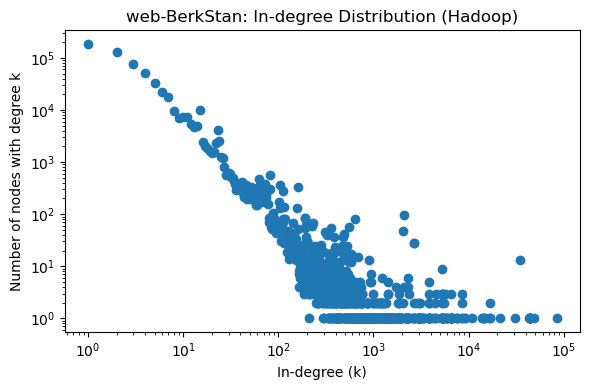

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the distribution file (degree, count)
df_web = pd.read_csv(
    "web_indegree_dist.txt",
    sep=r"\s+",          # split on whitespace or tab
    header=None,
    names=["degree", "count"]
)

# (Optional) Remove zero-degree if present
df_web = df_web[df_web["degree"] > 0]

# 2) Basic log–log scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df_web["degree"], df_web["count"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("In-degree (k)")
plt.ylabel("Number of nodes with degree k")
plt.title("web-BerkStan: In-degree Distribution (Hadoop)")
plt.tight_layout()
plt.show()

# Patents dataset

In [47]:
#per-node in-degree
import pandas as pd

# Per-node indegree (node_id, indegree)
df3_nodes = pd.read_csv(
    "patents_indegree_nodes.txt",
    sep=r"\s+",
    header=None,
    names=["node_id", "indegree"]
)

# Show first 10 rows
df3_nodes.head(10)

#indegree shows how many incoming edges that node has

,node_id,indegree
0,1,2
1,10000,1
2,100000,1
3,1000006,1
4,1000007,1
5,1000011,1
6,1000017,1
7,1000026,1
8,1000033,2
9,1000043,1


In [78]:
# Degree distribution (degree k, count of nodes with that k)
df3_dist = pd.read_csv(
    "patents_indegree_dist.txt",
    sep=r"\s+",
    header=None,
    names=["degree", "count"]
)

# Show first 10 rows 
df3_dist.head(10)

# count shows how many nodes have in-degree k

,degree,count
0,1,921239
1,10,66607
2,100,29
3,101,27
4,102,21
5,103,23
6,104,22
7,105,16
8,106,26
9,107,22


In [51]:
df3_dist.sort_values("degree").head(10)

,degree,count
0,1,921239
107,2,552276
163,3,380364
179,4,278449
192,5,210819
203,6,163138
221,7,127922
234,8,102155
245,9,82112
1,10,66607


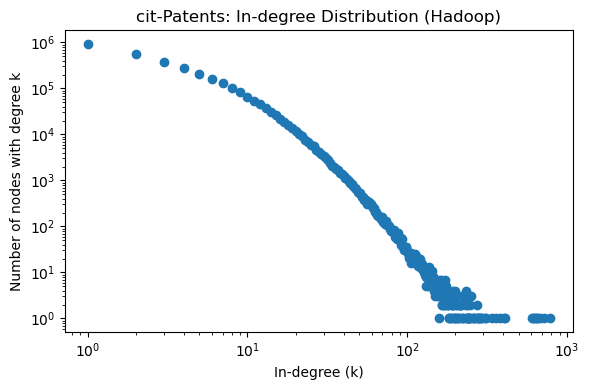

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the distribution file (degree, count)
df_patents = pd.read_csv(
    "patents_indegree_dist.txt",
    sep=r"\s+",          # split on whitespace or tab
    header=None,
    names=["degree", "count"]
)

# (Optional) Remove zero-degree if present
df_patents = df_patents[df_patents["degree"] > 0]

# 2) Basic log–log scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df_patents["degree"], df_patents["count"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("In-degree (k)")
plt.ylabel("Number of nodes with degree k")
plt.title("cit-Patents: In-degree Distribution (Hadoop)")
plt.tight_layout()
plt.show()

# LiveJournal Dataset

In [80]:
#per-node in-degree
import pandas as pd

# Per-node indegree (node_id, indegree)
df4_nodes = pd.read_csv(
    "livejournal_indegree_nodes.txt",
    sep=r"\s+",
    header=None,
    names=["node_id", "indegree"]
)

# Show first 10 rows
df4_nodes.head(10)

#indegree shows how many incoming edges that node has

,node_id,indegree
0,0,91
1,1,406
2,10,82
3,100,67
4,1000,149
5,10000,582
6,100000,136
7,1000000,13
8,1000001,42
9,1000002,1


In [82]:
# Degree distribution (degree k, count of nodes with that k)
df4_dist = pd.read_csv(
    "livejournal_indegree_dist.txt",
    sep=r"\s+",
    header=None,
    names=["degree", "count"]
)

# Show first 10 rows 
df4_dist.head(10)

# count shows how many nodes have in-degree k

,degree,count
0,1,1014392
1,10,96523
2,100,1809
3,1000,2
4,1001,2
5,1003,5
6,1004,1
7,1005,1
8,1007,4
9,1008,2


In [84]:
df4_dist.sort_values("degree").head(10)

,degree,count
0,1,1014392
529,2,553207
742,3,359549
897,4,264944
1021,5,208763
1136,6,171471
1255,7,144484
1367,8,124284
1473,9,109053
1,10,96523


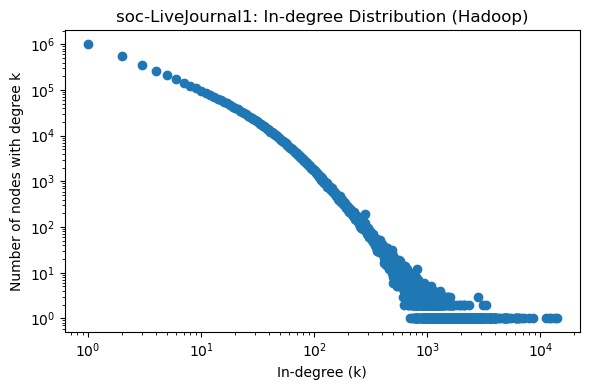

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the distribution file (degree, count)
df_livejournal = pd.read_csv(
    "livejournal_indegree_dist.txt",
    sep=r"\s+",          # split on whitespace or tab
    header=None,
    names=["degree", "count"]
)

# (Optional) Remove zero-degree if present
df_livejournal = df_livejournal[df_livejournal["degree"] > 0]

# 2) Basic log–log scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df_livejournal["degree"], df_livejournal["count"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("In-degree (k)")
plt.ylabel("Number of nodes with degree k")
plt.title("soc-LiveJournal1: In-degree Distribution (Hadoop)")
plt.tight_layout()
plt.show()

# Performance metrics

In [66]:
jobs = [
    # email
    ("logs/email_hadoop_stage1.log",   "email_hadoop_stage1",   "email",       "stage1_nodes"),
    ("logs/email_hadoop_stage2.log",   "email_hadoop_stage2",   "email",       "stage2_dist"),

    # web
    ("logs/web_hadoop_stage1.log",     "web_hadoop_stage1",     "web",         "stage1_nodes"),
    ("logs/web_hadoop_stage2.log",     "web_hadoop_stage2",     "web",         "stage2_dist"),

    # patents
    ("logs/patents_hadoop_stage1.log", "patents_hadoop_stage1", "patents",     "stage1_nodes"),
    ("logs/patents_hadoop_stage2.log", "patents_hadoop_stage2", "patents",     "stage2_dist"),

    # later, if add LiveJournal:
    ("logs/livejournal_hadoop_stage1.log", "livejournal_hadoop_stage1", "livejournal", "stage1_nodes"),
    ("logs/livejournal_hadoop_stage2.log", "livejournal_hadoop_stage2", "livejournal", "stage2_dist"),
]

rows = [parse_hadoop_log(path, job, ds, stage) for path, job, ds, stage in jobs]
hadoop_metrics_df = pd.DataFrame(rows)
hadoop_metrics_df


,job,dataset,stage,bytes_read,bytes_written,shuffle_bytes,map_time_ms,reduce_time_ms,cpu_time_ms,phys_mem_snapshot_bytes,virt_mem_snapshot_bytes,total_time_ms,total_time_sec
0,email_hadoop_stage1,email,stage1_nodes,1581753,634283,211106,2096,2282,2270,566116352,13577875456,4378,4.378
1,email_hadoop_stage2,email,stage2_dist,638379,3093,3102,3322,1873,2490,833748992,18698211328,5195,5.195
2,web_hadoop_stage1,web,stage1_nodes,19657604,5540461,1712254,19657,11746,34040,777818112,13579759616,31403,31.403
3,web_hadoop_stage2,web,stage2_dist,5544557,6101,10506,5557,3190,4770,908541952,18699292672,8747,8.747
4,patents_hadoop_stage1,patents,stage1_nodes,85139832,32858439,8169050,59969,25181,104180,869474304,13578928128,85150,85.150
5,patents_hadoop_stage2,patents,stage2_dist,32862535,1708,31986,10052,6131,9200,871075840,18692927488,16183,16.183
6,livejournal_hadoop_stage1,livejournal,stage1_nodes,259619239,45437236,13805173,227003,86013,410140,762281984,13582303232,313016,313.016
7,livejournal_hadoop_stage2,livejournal,stage2_dist,45441332,10937,54526,12516,7960,11920,937570304,18694742016,20476,20.476


In [68]:
import pandas as pd

jobs = [
    ("logs/email_hadoop_stage1.log",   "email_hadoop_stage1",   "email",   "stage1_nodes"),
    ("logs/email_hadoop_stage2.log",   "email_hadoop_stage2",   "email",   "stage2_dist"),
    ("logs/web_hadoop_stage1.log",     "web_hadoop_stage1",     "web",     "stage1_nodes"),
    ("logs/web_hadoop_stage2.log",     "web_hadoop_stage2",     "web",     "stage2_dist"),
    ("logs/patents_hadoop_stage1.log", "patents_hadoop_stage1", "patents", "stage1_nodes"),
    ("logs/patents_hadoop_stage2.log", "patents_hadoop_stage2", "patents", "stage2_dist"),
    ("logs/livejournal_hadoop_stage1.log", "livejournal_hadoop_stage1", "livejournal", "stage1_nodes"),
    ("logs/livejournal_hadoop_stage2.log", "livejournal_hadoop_stage2", "livejournal", "stage2_dist"),
    # later add livejournal here
]

rows = [parse_hadoop_log(path, job, ds, stage) for path, job, ds, stage in jobs]
hadoop_metrics_df = pd.DataFrame(rows)

In [70]:
# Time in seconds
hadoop_metrics_df["cpu_time_sec"] = hadoop_metrics_df["cpu_time_ms"] / 1000.0
hadoop_metrics_df["total_time_sec"] = hadoop_metrics_df["total_time_ms"] / 1000.0

# Memory in MB
hadoop_metrics_df["phys_mem_MB"] = hadoop_metrics_df["phys_mem_snapshot_bytes"] / (1024**2)
hadoop_metrics_df["virt_mem_MB"] = hadoop_metrics_df["virt_mem_snapshot_bytes"] / (1024**2)

# I/O & shuffle in MB
hadoop_metrics_df["bytes_read_MB"] = hadoop_metrics_df["bytes_read"] / (1024**2)
hadoop_metrics_df["bytes_written_MB"] = hadoop_metrics_df["bytes_written"] / (1024**2)
hadoop_metrics_df["shuffle_MB"] = hadoop_metrics_df["shuffle_bytes"] / (1024**2)

In [72]:
summary_by_dataset = hadoop_metrics_df.groupby("dataset").agg({
    # Execution time: sum over both stages
    "total_time_sec": "sum",
    
    # CPU utilization: sum of total CPU time
    "cpu_time_sec": "sum",
    
    # Disk I/O: sum read + written across both stages
    "bytes_read_MB": "sum",
    "bytes_written_MB": "sum",
    
    # Network / shuffle overhead: sum
    "shuffle_MB": "sum",
    
    # Memory usage: take peak (max of snapshot across stages)
    "phys_mem_MB": "max",
    "virt_mem_MB": "max",
})

# Make columns nicer
summary_by_dataset = summary_by_dataset.rename(columns={
    "total_time_sec": "exec_time_sec",
    "cpu_time_sec": "cpu_time_sec",
    "bytes_read_MB": "disk_read_MB",
    "bytes_written_MB": "disk_written_MB",
    "shuffle_MB": "shuffle_MB",
    "phys_mem_MB": "peak_phys_mem_MB",
    "virt_mem_MB": "peak_virt_mem_MB",
})

summary_by_dataset

,exec_time_sec,cpu_time_sec,disk_read_MB,disk_written_MB,shuffle_MB,peak_phys_mem_MB,peak_virt_mem_MB
dataset,,,,,,,
email,9.573,4.76,2.117283,0.607849,0.204285,795.125000,17832.003906
livejournal,333.492,422.06,290.928432,43.342755,13.217639,894.136719,17828.695312
patents,101.333,113.38,112.535827,31.337878,7.821117,830.722656,17826.964844
web,40.150,38.81,24.034654,5.289614,1.642952,866.453125,17833.035156


In [63]:
summary_by_dataset.to_csv("hadoop_metrics_summary_by_dataset.csv") # without livejournal dataset summary

In [74]:
summary_by_dataset.to_csv("hadoop_metrics_summary_by_dataset1.csv") # with livejournal dataset summary

# LiveJournal Dataset with Optimization (reducer=4)

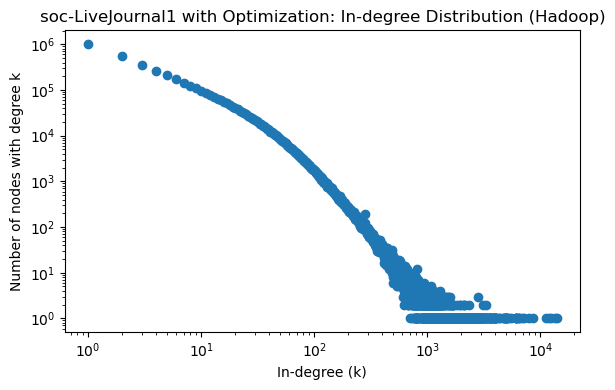

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the distribution file (degree, count)
df_livejournal_opt = pd.read_csv(
    "livejournal_indegree_dist_opt.txt",
    sep=r"\s+",          # split on whitespace or tab
    header=None,
    names=["degree", "count"]
)

# (Optional) Remove zero-degree if present
df_livejournal = df_livejournal[df_livejournal["degree"] > 0]

# 2) Basic log–log scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df_livejournal["degree"], df_livejournal["count"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("In-degree (k)")
plt.ylabel("Number of nodes with degree k")
plt.title("soc-LiveJournal1 with Optimization: In-degree Distribution (Hadoop)")
plt.tight_layout()
plt.show()

# performance metrics comparison between Baseline and optimization for Live Journal dataset

In [93]:
import pandas as pd

rows = []

# Baseline Stage 1
m = parse_hadoop_log(
    "logs/livejournal_hadoop_stage1.log",
    job_name="livejournal_stage1_baseline",
    dataset="livejournal",
    stage="stage1_nodes",
)
m["config"] = "baseline"
rows.append(m)

# Baseline Stage 2
m = parse_hadoop_log(
    "logs/livejournal_hadoop_stage2.log",
    job_name="livejournal_stage2_baseline",
    dataset="livejournal",
    stage="stage2_dist",
)
m["config"] = "baseline"
rows.append(m)

# Optimised Stage 1
m = parse_hadoop_log(
    "logs/livejournal_hadoop_stage1_opt.log",
    job_name="livejournal_stage1_opt",
    dataset="livejournal",
    stage="stage1_nodes",
)
m["config"] = "optimized"
rows.append(m)

# Optimised Stage 2
m = parse_hadoop_log(
    "logs/livejournal_hadoop_stage2_opt.log",
    job_name="livejournal_stage2_opt",
    dataset="livejournal",
    stage="stage2_dist",
)
m["config"] = "optimized"
rows.append(m)

lj_df = pd.DataFrame(rows)
lj_df

,job,dataset,stage,bytes_read,bytes_written,shuffle_bytes,map_time_ms,reduce_time_ms,cpu_time_ms,phys_mem_snapshot_bytes,virt_mem_snapshot_bytes,total_time_ms,total_time_sec,config
0,livejournal_stage1_baseline,livejournal,stage1_nodes,259619239,45437236,13805173,227003,86013,410140,762281984,13582303232,313016,313.016,baseline
1,livejournal_stage2_baseline,livejournal,stage2_dist,45441332,10937,54526,12516,7960,11920,937570304,18694742016,20476,20.476,baseline
2,livejournal_stage1_opt,livejournal,stage1_nodes,259619239,45437236,15635054,201378,86299,381470,2571186176,38974898176,287677,287.677,optimized
3,livejournal_stage2_opt,livejournal,stage2_dist,45437236,10937,61857,20685,16429,23830,2314842112,54315732992,37114,37.114,optimized


In [95]:
# Time
lj_df["cpu_time_sec"] = lj_df["cpu_time_ms"] / 1000.0
lj_df["total_time_sec"] = lj_df["total_time_ms"] / 1000.0

# Memory
lj_df["phys_mem_MB"] = lj_df["phys_mem_snapshot_bytes"] / (1024**2)
lj_df["virt_mem_MB"] = lj_df["virt_mem_snapshot_bytes"] / (1024**2)

# I/O & shuffle
lj_df["bytes_read_MB"] = lj_df["bytes_read"] / (1024**2)
lj_df["bytes_written_MB"] = lj_df["bytes_written"] / (1024**2)
lj_df["shuffle_MB"] = lj_df["shuffle_bytes"] / (1024**2)

lj_df

,job,dataset,stage,bytes_read,bytes_written,shuffle_bytes,map_time_ms,reduce_time_ms,cpu_time_ms,phys_mem_snapshot_bytes,virt_mem_snapshot_bytes,total_time_ms,total_time_sec,config,cpu_time_sec,phys_mem_MB,virt_mem_MB,bytes_read_MB,bytes_written_MB,shuffle_MB
0,livejournal_stage1_baseline,livejournal,stage1_nodes,259619239,45437236,13805173,227003,86013,410140,762281984,13582303232,313016,313.016,baseline,410.14,726.968750,12953.093750,247.592200,43.332325,13.165639
1,livejournal_stage2_baseline,livejournal,stage2_dist,45441332,10937,54526,12516,7960,11920,937570304,18694742016,20476,20.476,baseline,11.92,894.136719,17828.695312,43.336231,0.010430,0.052000
2,livejournal_stage1_opt,livejournal,stage1_nodes,259619239,45437236,15635054,201378,86299,381470,2571186176,38974898176,287677,287.677,optimized,381.47,2452.074219,37169.359375,247.592200,43.332325,14.910749
3,livejournal_stage2_opt,livejournal,stage2_dist,45437236,10937,61857,20685,16429,23830,2314842112,54315732992,37114,37.114,optimized,23.83,2207.605469,51799.519531,43.332325,0.010430,0.058991


In [97]:
lj_compare = lj_df.groupby("config").agg({
    "total_time_sec": "sum",
    "cpu_time_sec": "sum",
    "bytes_read_MB": "sum",
    "bytes_written_MB": "sum",
    "shuffle_MB": "sum",
    "phys_mem_MB": "max",
    "virt_mem_MB": "max",
})

lj_compare = lj_compare.rename(columns={
    "total_time_sec": "exec_time_sec",
    "phys_mem_MB": "peak_phys_mem_MB",
    "virt_mem_MB": "peak_virt_mem_MB",
})

lj_compare

,exec_time_sec,cpu_time_sec,bytes_read_MB,bytes_written_MB,shuffle_MB,peak_phys_mem_MB,peak_virt_mem_MB
config,,,,,,,
baseline,333.492,422.06,290.928432,43.342755,13.217639,894.136719,17828.695312
optimized,324.791,405.30,290.924525,43.342755,14.969741,2452.074219,51799.519531


In [99]:
lj_compare.to_csv("hadoop_metrics_lj_compare.csv") # with livejournal optimization dataset summary